In [1]:
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
from sklearn import show_versions #버전확인

show_versions() # check sklearn version


System:
    python: 3.7.10 (default, Feb 20 2021, 21:17:23)  [GCC 7.5.0]
executable: /usr/bin/python3
   machine: Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic

Python dependencies:
       pip: 19.3.1
setuptools: 53.0.0
   sklearn: 0.22.2.post1
     numpy: 1.19.5
     scipy: 1.4.1
    Cython: 0.29.22
    pandas: 1.1.5
matplotlib: 3.2.2
    joblib: 1.0.1

Built with OpenMP: True


In [3]:
warnings.simplefilter(action='ignore', category=FutureWarning)
    # R과 비슷한 코드 작성을 위해 FutureWarning 무시
plt.style.use('seaborn')
    # 'ggplot'등 취향에 따라 그래프(matplotlib) style 선택 가능
    # https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html 참고

# 군집분석

참고 링크 : https://scikit-learn.org/stable/modules/clustering.html


In [4]:
from google.colab import drive
drive.mount('/content/drive')
# 내 구글드라이브에 저장된 데이터 파일을 읽기 위해 셋팅

Mounted at /content/drive


In [5]:
### 데이터 불러오기 ###
# 내 컴퓨터에 저장된 데이터의 경우 다음 실행 (경로유의)
# cluster_data = pd.read_csv('./data/cluster.csv') # 데스크탑에서 실행할때 이용 (파일 경로에 유의)

# 구글드라이브에 저장된 데이터의 경우 다음 실행 (경로유의)     
cluster_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/cluster.csv')

cluster_data.head() # 데이터의 처음 5줄을 확인 (2차원 데이터 임)

,x1,x2
0,20.42,18.78
1,11.89,16.38
2,16.56,8.57
3,14.46,10.19
4,21.57,6.31


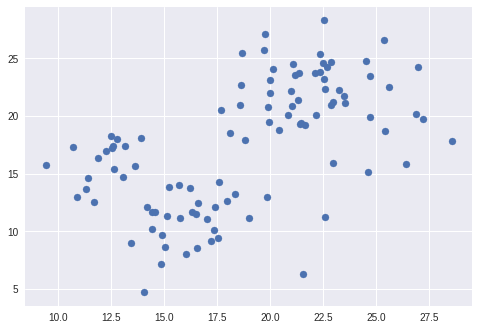

In [6]:
plt.scatter('x1', 'x2', data=cluster_data)
plt.show() # 데이터의 산점도 출력

# K-means 방법 (K-means Clustering)
참고 링크 : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=0).fit(cluster_data)
    # n_clusters : 군집수(=K) 지정 
    # n_init : 다른 초기 할당을 이용한 전체 알고리즘의 반복 횟수

In [9]:
# 군집 분류 결과 출력
print(kmeans.labels_)

[0 3 1 1 1 1 1 2 2 1 3 0 1 1 0 1 0 3 1 3 1 0 0 1 1 2 2 0 3 0 0 3 2 1 2 1 1
 1 0 2 2 0 3 2 1 2 2 2 0 2 1 1 3 2 1 2 3 0 2 0 1 3 1 0 1 2 1 0 3 3 3 3 2 2
 2 1 3 0 2 0 1 0 3 2 0 0 2 0 0 3 2 0 2 1 1 1 2 0 1 0]


In [ ]:
# 각 군집의 중심점들 출력 (지정된 K 개)
print(kmeans.cluster_centers_)

[[22.42115385 19.44346154]
 [16.56903226 10.80064516]
 [22.10230769 24.17115385]
 [12.15       16.01411765]]


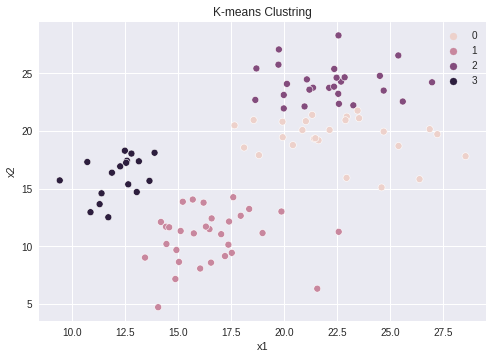

In [11]:
sns.scatterplot('x1', 'x2', hue=kmeans.labels_,
               data=cluster_data) #색깔 자동 지정
plt.title('K-means Clustring')
plt.show() #군집분석 결과 그림

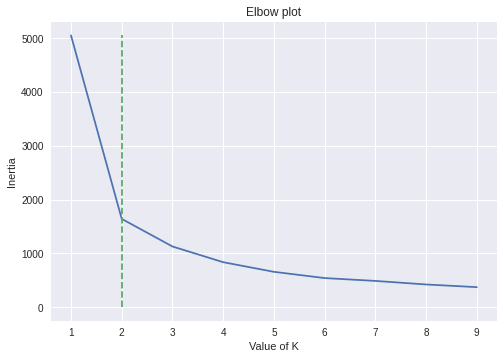

In [12]:
# Elbow plot 재현 (건너 뛰어도 무방함)

number_clusters = range(1,10) # 가능한 K 값을 1-10 까지 지정
inertias = []

for number in number_clusters: # 각 K 값에 대해 K-means 실행
    temp_kmeans = KMeans(n_clusters=number).fit(cluster_data)
    inertias.append(temp_kmeans.inertia_) # 각 K 값에 대해 Inertia 계산

line_number = 2 # Elbow plot을 보고 2이외에 다르게 주관적으로 설정 가능

plt.plot(number_clusters, inertias)
plt.xlabel('Value of K')
plt.ylabel('Inertia')
plt.title('Elbow plot')
plt.plot(np.linspace(line_number,line_number,6),np.linspace(0,np.max(inertias),6),'--')
plt.show()

# Mean-Shift Clustering

참고 링크 : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html

In [13]:
from sklearn.cluster import MeanShift

In [14]:
meanshift = MeanShift(bandwidth=None).fit(cluster_data)
    # bandwidth : 원반경의 크기 지정 (try 5)
    #'None'으로 지정시 적절한 값을 내부적으로 사용

In [15]:
# 군집 분류 결과
print(meanshift.labels_)

[0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1
 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0
 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0]


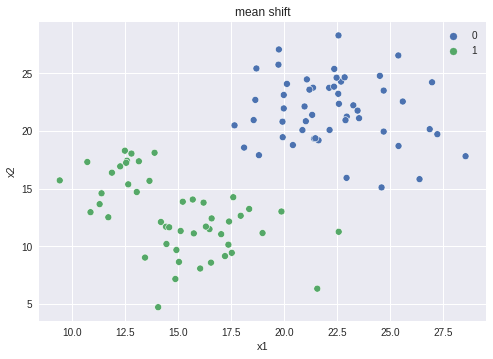

In [16]:
sns.scatterplot('x1', 'x2', hue=meanshift.labels_,
               data=cluster_data)
plt.title('mean shift')
plt.show()  #군집분석의 결과 출력

# 가우스혼합모형 (Gaussian Mixture Model)

참고 링크 : https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

In [17]:
from sklearn.mixture import GaussianMixture

In [18]:
gmm = GaussianMixture(n_components=3, random_state=0).fit(cluster_data)
    # n_components : 군집의 수 지정 (K)

In [19]:
predict_gmm = gmm.predict(cluster_data)
print(predict_gmm) #군집분석의 결과

[0 2 1 1 1 1 1 0 0 1 2 0 1 1 0 1 0 2 1 2 1 0 0 1 1 0 0 0 2 0 0 2 0 1 0 1 1
 1 0 0 0 0 2 0 1 0 0 0 0 0 1 1 2 0 1 0 2 0 0 0 1 2 1 0 1 0 1 0 2 2 2 2 0 0
 0 1 2 0 0 0 1 0 2 0 0 0 0 0 0 2 0 0 0 1 1 1 0 0 1 0]


In [20]:
predict_gmm_prob = gmm.predict_proba(cluster_data)
print(predict_gmm_prob) #Soft clustering 결과 출력

[[9.97962240e-01 2.03775962e-03 1.02414697e-12]
 [7.48626598e-06 3.49578068e-03 9.96496733e-01]
 [8.17108627e-07 9.99999183e-01 3.60706533e-13]
 [6.66494708e-07 9.99995019e-01 4.31414678e-06]
 [7.20555297e-05 9.99927944e-01 7.22828636e-36]
 [1.75059108e-05 9.99982494e-01 6.72474845e-13]
 [9.11258214e-06 9.98136518e-01 1.85436959e-03]
 [9.99999999e-01 6.06401972e-10 4.09191172e-19]
 [9.99999976e-01 2.36942415e-08 5.45459316e-18]
 [1.03511576e-05 9.99989469e-01 1.79994839e-07]
 [2.08218983e-04 5.61097484e-03 9.94180806e-01]
 [9.99760289e-01 2.39710636e-04 5.21017771e-16]
 [1.46345654e-07 9.99999852e-01 2.10602888e-09]
 [7.19197256e-06 9.99986775e-01 6.03320845e-06]
 [9.99999846e-01 1.53608346e-07 1.09255513e-52]
 [9.46151368e-04 9.98468750e-01 5.85098740e-04]
 [9.99920006e-01 7.99940141e-05 6.42782872e-11]
 [1.87191666e-04 1.34329906e-03 9.98469509e-01]
 [3.10708497e-04 9.99689291e-01 5.30233581e-10]
 [9.38734497e-06 1.57575893e-03 9.98414854e-01]
 [4.08392751e-05 9.99959149e-01 1.217149

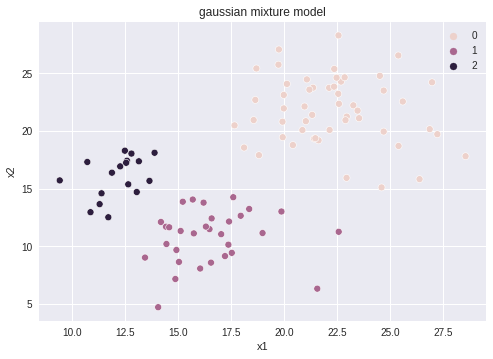

In [21]:
sns.scatterplot('x1', 'x2', hue=predict_gmm,
               data=cluster_data)
plt.title('gaussian mixture model') 
plt.show()  #군집분석의 결과

In [22]:
gmm.aic(cluster_data) # AIC 계산

1121.650486196588

# 계층적 군집분석 (Hierarchical Clustering, Agglomerative Nesting)

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [24]:
cluster_data.head()

,x1,x2
0,20.42,18.78
1,11.89,16.38
2,16.56,8.57
3,14.46,10.19
4,21.57,6.31


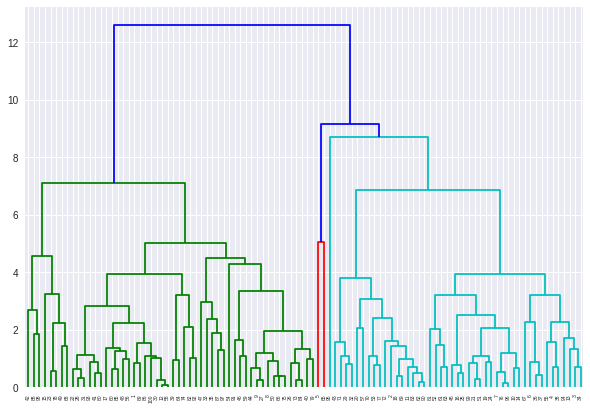

In [25]:
linked = linkage(cluster_data, 'average') 
  # 계층적 군집분석 실행 후 결과 저장
  # complete, single, average 중 택일

# 개체이름 지정 (100개의 개체)
labelList = range(1, 101) # 1부터 101 직전까지 (즉, 100까지)

plt.figure(figsize=(10, 7))
dendrogram(linked, # 계층적 군집분석 결과 이용
            labels=labelList)
plt.show()

 수형도 (Dendrogram)를 통해서 군집의 수와 연결법을 결정했다면 `sklearn.cluster.AgglomerativeClustering`을 사용해 계층적 방법의 결과를 그림으로 나타낼 수 있다.

참고 링크1 : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

참고 링크2 : https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

In [26]:
from sklearn.cluster import AgglomerativeClustering

In [27]:
agnes = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(cluster_data)
    # n_clusters : 군집의 수
    # linkage: complete, single, average 중 택일

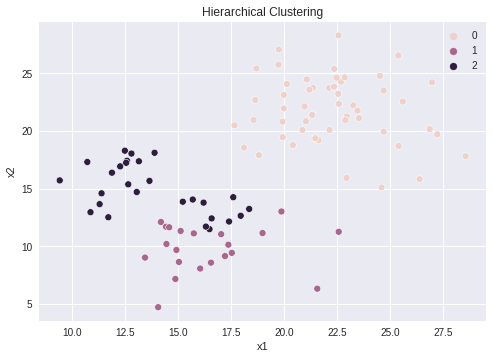

In [28]:
sns.scatterplot('x1', 'x2', hue=agnes.labels_,
               data=cluster_data)
plt.title('Hierarchical Clustering')
plt.show()